In [811]:
import numpy as np # linear algebra
import seaborn as sns
sns.set_palette("husl")

import matplotlib.pyplot as plt
PW = 10
PH = 6
plt.rcParams['figure.figsize'] = (PW, PH) 
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

import datetime as dt
from ggplot import *

dir_path = "./Meteorological Data/" 
%matplotlib inline

import os
print(os.listdir(dir_path))

['Melbourne - 086071-Table 1.csv', 'Brisbane - 040913-Table 1.csv', 'Adelaide - 023090-Table 1.csv', 'Perth - 009225-Table 1.csv', 'Sydney - 066062-Table 1.csv']


In [812]:
files = ['Melbourne - 086071-Table 1.csv', 'Brisbane - 040913-Table 1.csv',
         'Adelaide - 023090-Table 1.csv', 'Perth - 009225-Table 1.csv', 'Sydney - 066062-Table 1.csv']

## Preprocessing

In [813]:
city = 0
days = 365
df = pd.read_csv(dir_path + files[city], encoding="utf-8")
df["City"] = files[city].split(" ")[0]
df = df[-days:]

for city in range(1, len(files)):
    
    tdf = pd.read_csv(dir_path + files[city], encoding="utf-8")
    tdf = tdf[-days:]
    
    #Drop Unnamed Column
    if city in [1,2,4]:
        tdf.drop([tdf.columns[-1]], axis=1, inplace=True)
    
    tdf["City"] = files[city].split(" ")[0]
    df = pd.concat([df, tdf])
        

#Add quartals of the year
df["Quarter"] = df.Date.apply(lambda x: pd.Timestamp(x).quarter)
#Infere Season
df["Season"] = df["Quarter"].apply(lambda x: "Summer" if x in[1,4] else "Winter")
#Save Date for plotting
df["DateI"] = pd.to_datetime(df.Date)
df.set_index(df.Date, inplace=True)
df.drop(["Day","Date"], axis=1, inplace=True)

#New Columns
df["Daily Temperature Variation"] = df[u"Maximum temperature (°C)"] - df[u"Minimum temperature (°C)"]

#Sort df
df = df.sort_values(["DateI","City"])

print(df.columns)
df.head(3)

Index([         u'Minimum temperature (°C)',
                u'Maximum temperature (°C)',
                           u'Rainfall (mm)',
                        u'Evaporation (mm)',
                        u'Sunshine (hours)',
         u'Direction of maximum wind gust ',
       u'Speed of maximum wind gust (km/h)',
               u'Time of maximum wind gust',
                    u'9am Temperature (°C)',
               u'9am relative humidity (%)',
                u'9am cloud amount (oktas)',
                      u'9am wind direction',
                   u'9am wind speed (km/h)',
                  u'9am MSL pressure (hPa)',
                    u'3pm Temperature (°C)',
               u'3pm relative humidity (%)',
                u'3pm cloud amount (oktas)',
                      u'3pm wind direction',
                   u'3pm wind speed (km/h)',
                  u'3pm MSL pressure (hPa)',
                                    u'City',
                                 u'Quarter',
          

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),City,Quarter,Season,DateI,Daily Temperature Variation
Date,,,,,,,,,,,,,,,,,,,,,,,,,
1/1/2014,22.0,33.0,NaN,NaN,0.5,WSW,43.0,13:15,29.8,29.0,NaN,ENE,4.0,1006.1,29.7,50.0,NaN,SSW,24.0,1007.0,Adelaide,1,Summer,2014-01-01,11.0
1/1/2014,20.6,30.6,0.0,3.4,12.5,ENE,31.0,14:18,28.8,52.0,4.0,SE,7.0,1015.2,28.9,52.0,1.0,ENE,11.0,1013.1,Brisbane,1,Summer,2014-01-01,10.0
1/1/2014,16.2,26.3,0.0,10.6,0.0,N,80.0,11:01,21.9,91.0,NaN,N,43.0,1010.1,NaN,NaN,NaN,N,35.0,1003.7,Melbourne,1,Summer,2014-01-01,10.1


##  Fill NaNs

In [814]:
#IsNan Cols#IsNan C 
p = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
p = p[p > 0]
p

3pm cloud amount (oktas)             0.295342
9am cloud amount (oktas)             0.276712
Evaporation (mm)                     0.065753
Rainfall (mm)                        0.050411
9am wind speed (km/h)                0.032877
Sunshine (hours)                     0.006027
Direction of maximum wind gust       0.006027
Speed of maximum wind gust (km/h)    0.006027
Time of maximum wind gust            0.004384
3pm wind speed (km/h)                0.003288
3pm relative humidity (%)            0.002192
3pm Temperature (°C)                 0.001644
9am Temperature (°C)                 0.001096
9am relative humidity (%)            0.001096
Daily Temperature Variation          0.001096
9am MSL pressure (hPa)               0.000548
Maximum temperature (°C)             0.000548
Minimum temperature (°C)             0.000548
dtype: float64

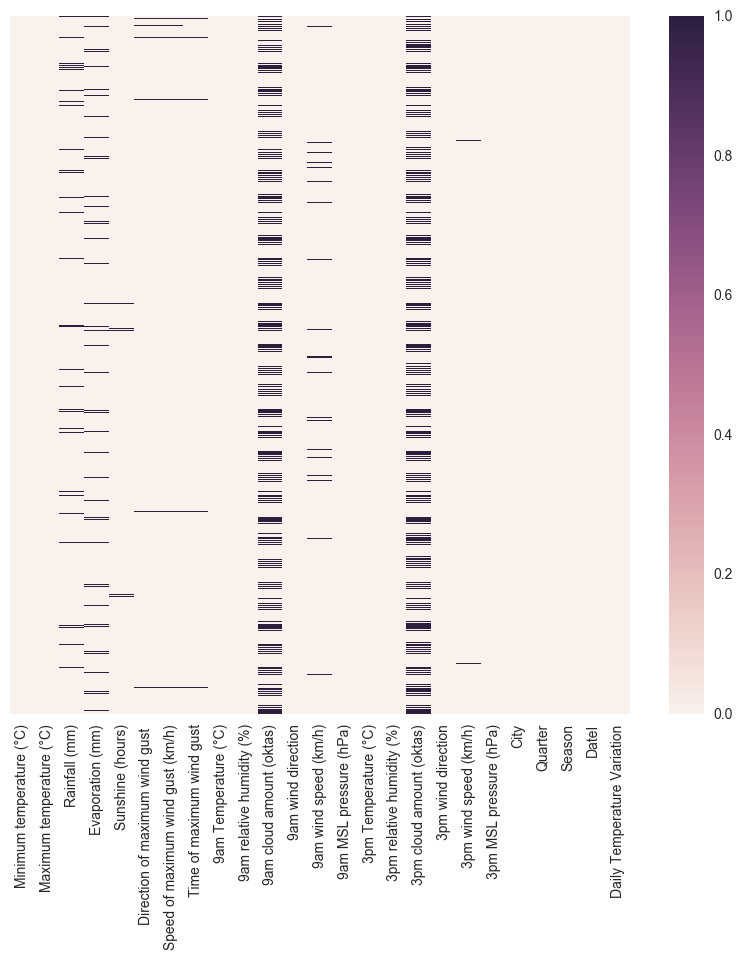

In [815]:
#Plot Nans
f, ax = plt.subplots(1,1,figsize=(PW,1.5*PH))
mnn = pd.DataFrame(np.array(df.isnull().values, dtype='bool')+1-1, columns=df.columns)
sns.heatmap(mnn, ax=ax, yticklabels=False);

Index([u'Adelaide', u'Brisbane', u'Melbourne', u'Perth', u'Sydney'], dtype='object', name=u'City')


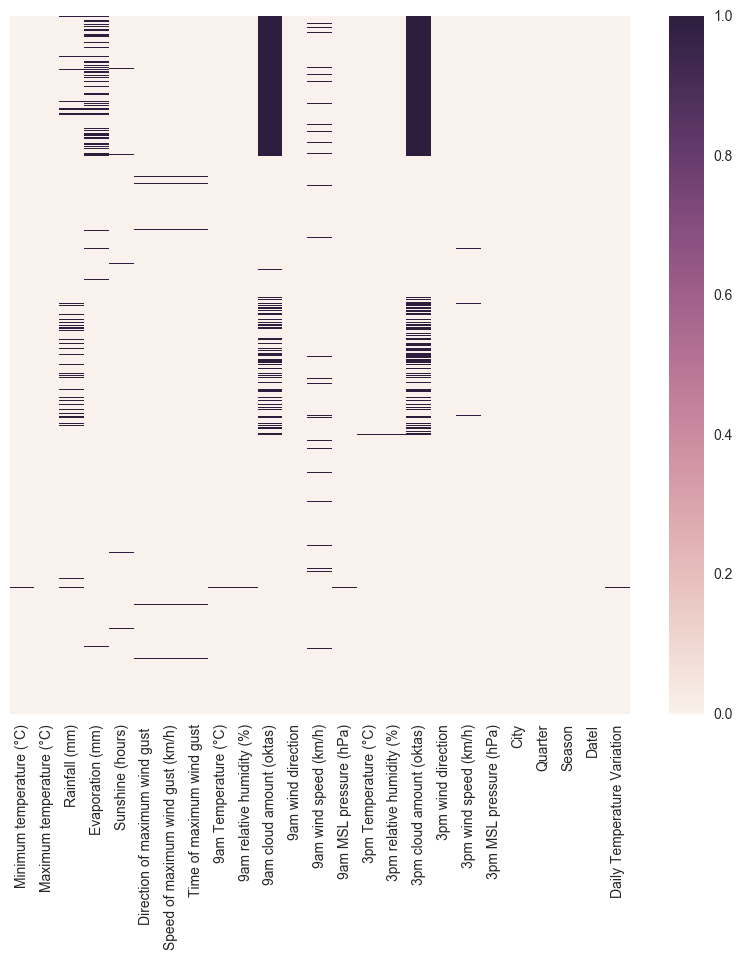

In [816]:
#Plot Nans Per City
f, ax = plt.subplots(1,1,figsize=(PW,1.5*PH))
mnn = pd.DataFrame(np.array(df.sort_values("City").isnull().values, dtype='bool')+1-1, columns=df.columns)
sns.heatmap(mnn, ax=ax, yticklabels=False);
print df.groupby("City").sum().index

In [817]:
#Fill Group Median/Mode
medCols = p.index
for col in medCols:
    if df[col].dtype != object:
        df[col] = df[col].fillna(df[col].median())
        df[col] = df.groupby(["City","Quarter"])[col].transform(lambda x: x.fillna(x.median()))
    else:
        df[col] = df.groupby(["City","Quarter"])[col].transform(lambda x: x.fillna(lambda y: y.mode()[0]))

## Exploratory Analysis

In [818]:
def plot_dists(df, p):
    nrows = 2
    ncols = int(np.ceil(len(p) / float(nrows)))
    #f, ax = plt.subplots(ncols, nrows, figsize=(nrows*PW,ncols*PH))
    ind = 0
    for col in p:
        if df[col].dtype == object:
            continue
#             topl =  df[df[col].notnull()][col].value_counts()
#             sns.barplot(x=np.array(topl.index), y= np.array(topl.values), ax=ax[int(ind/nrows),ind%nrows])
#             ax[int(ind/nrows),ind%nrows].set_xlabel(col)
#             ind += 1
        elif df[col].dtype != "datetime64[ns]":
            topl = df[df[col].notnull()][col]
            if len(topl) > 0:
                #sns_plt = sns.violinplot(x="City", y=col, hue="Season" ,split=True, data=df, ax=ax[int(ind/nrows),ind%nrows],palette=pal)
                pal = sns.diverging_palette(20, 200, s=75, l=75, n=2)
                f, ax = plt.subplots(1, 1, figsize=(PW,PH))
                sns_plt = sns.violinplot(x="City", y=col, hue="Season",split=True, data=df, palette=pal, ax=ax)
                sns_plt.figure.savefig("./Plots/Dist" + col.replace("/","") + ".png")
                ind += 1
        else:
            continue

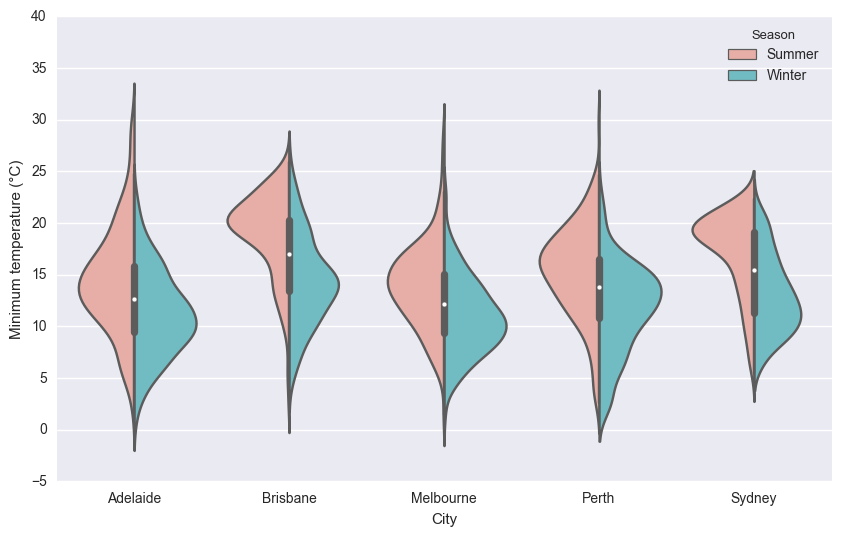

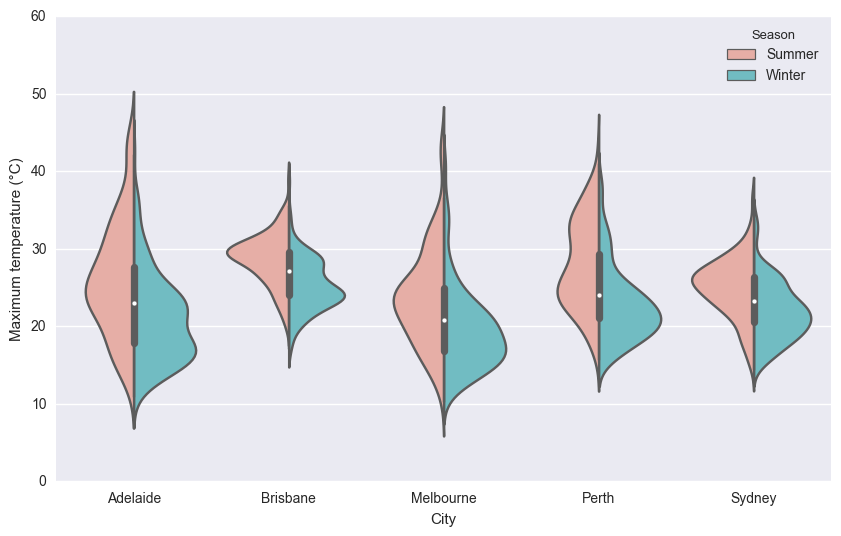

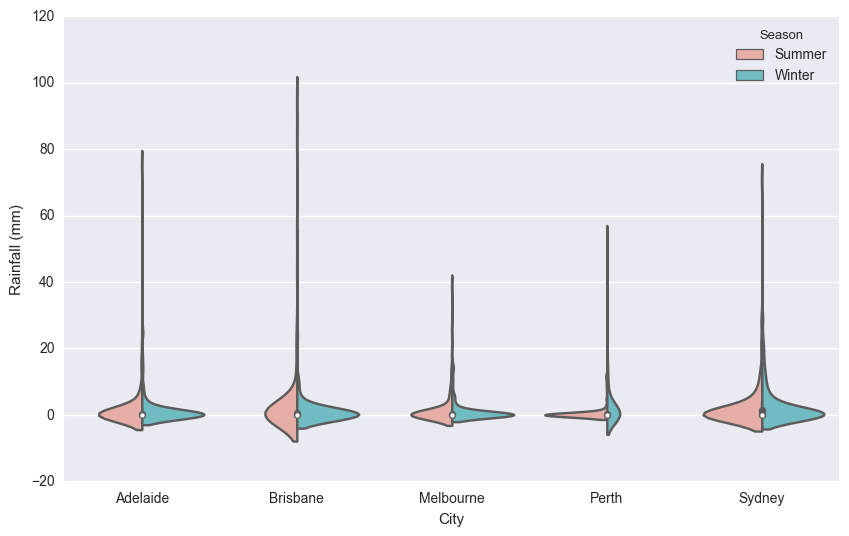

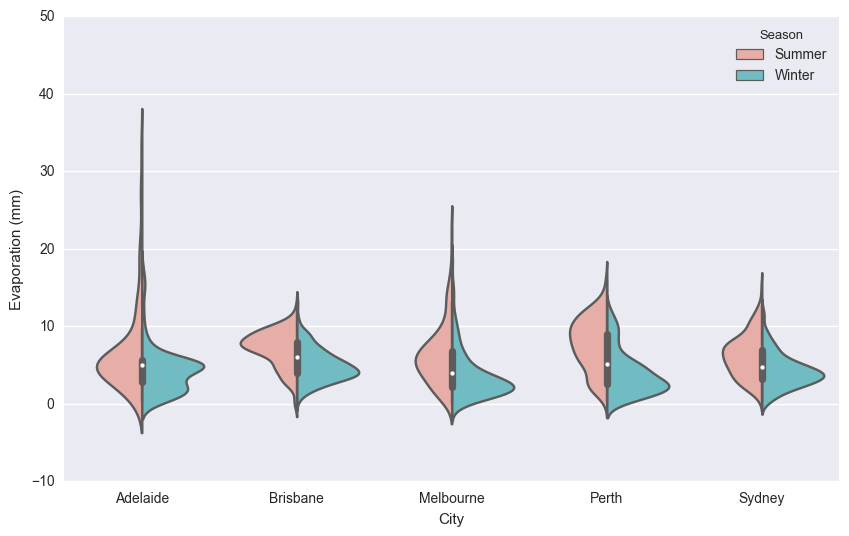

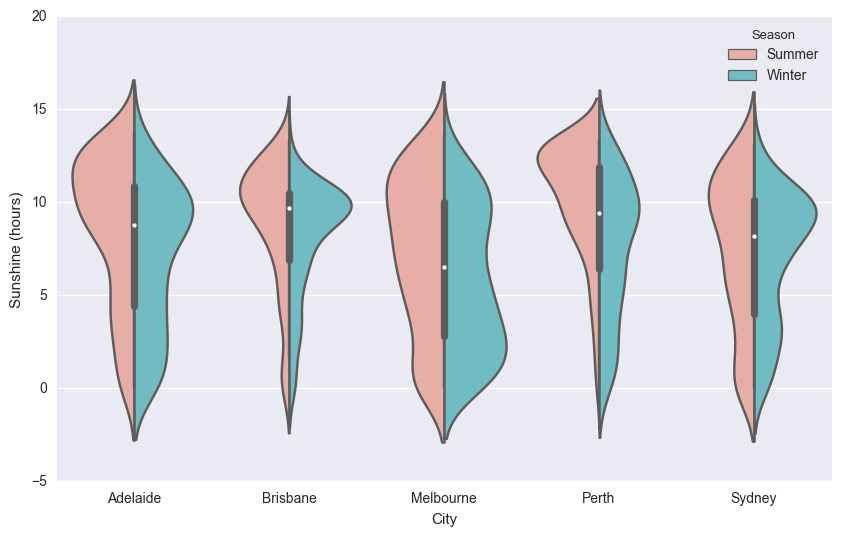

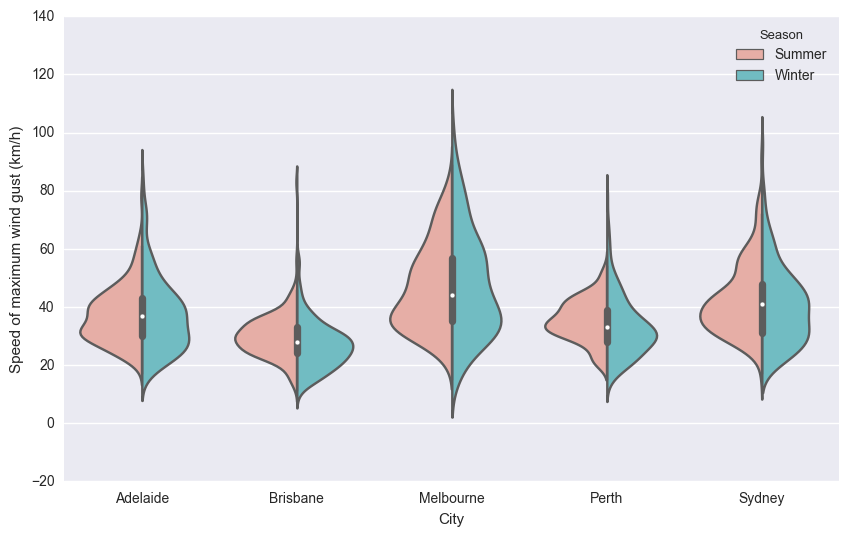

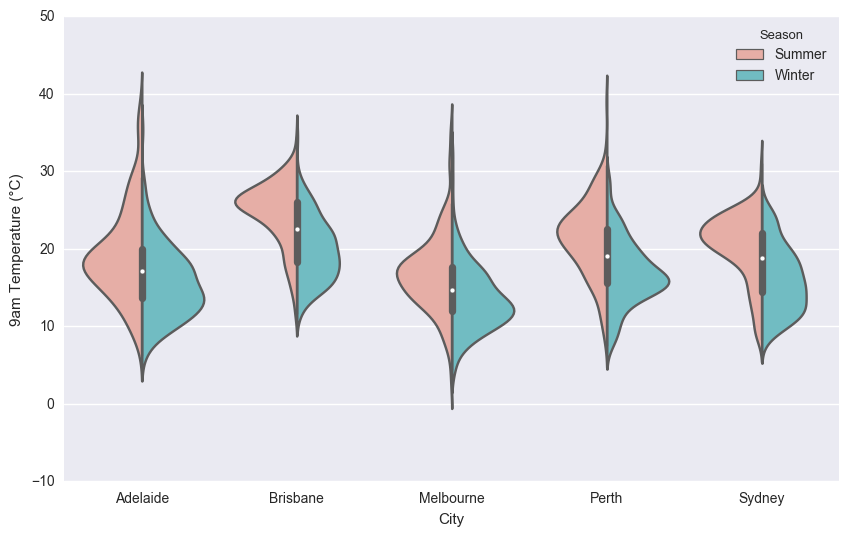

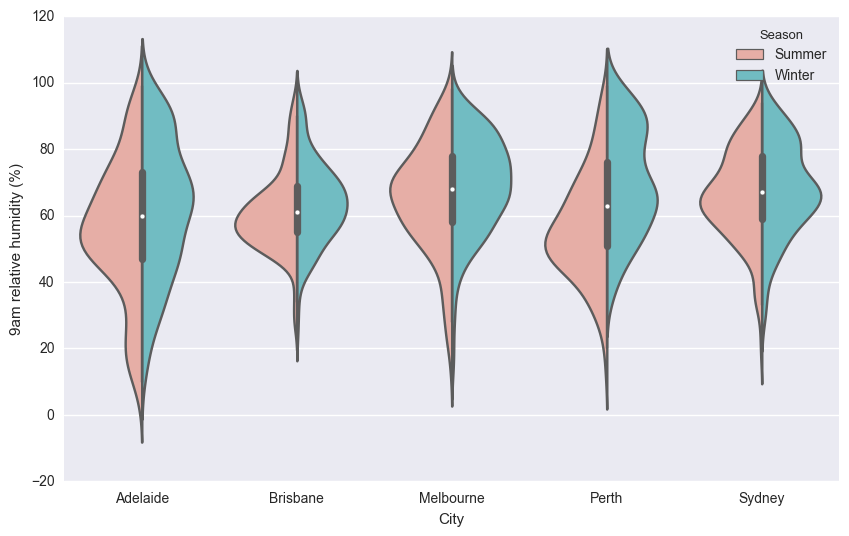

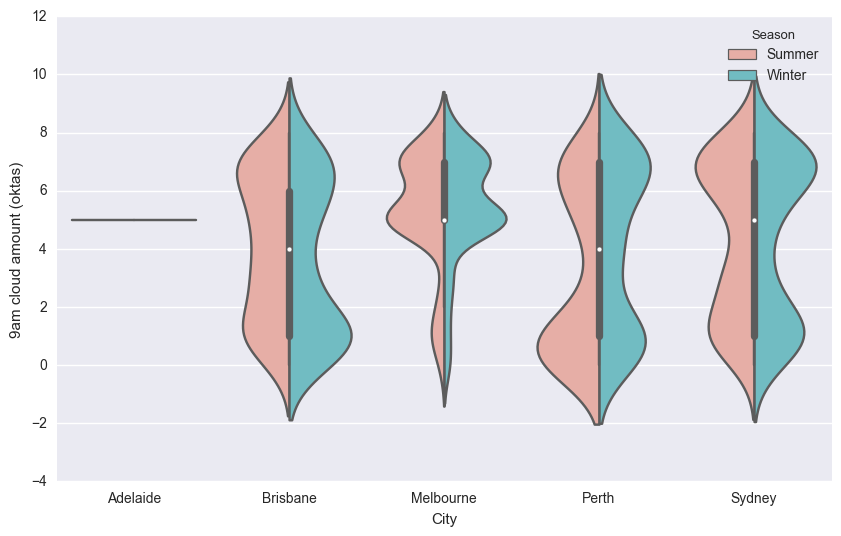

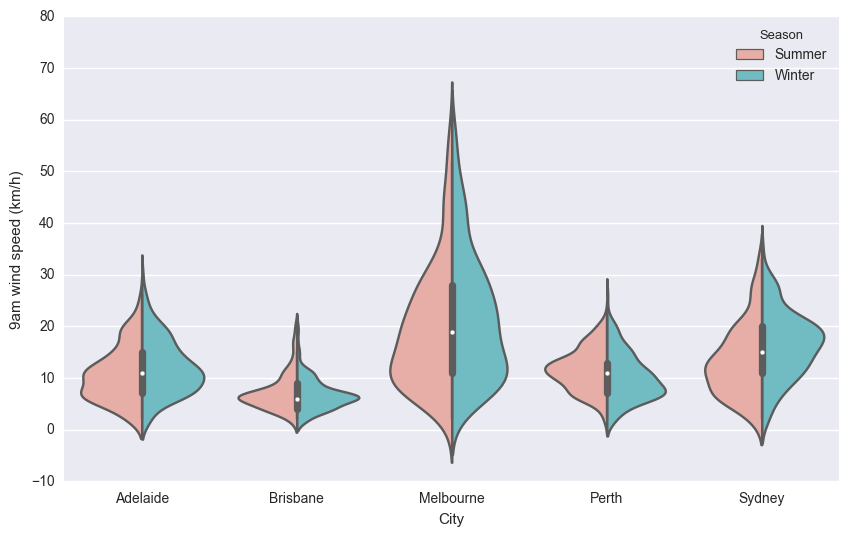

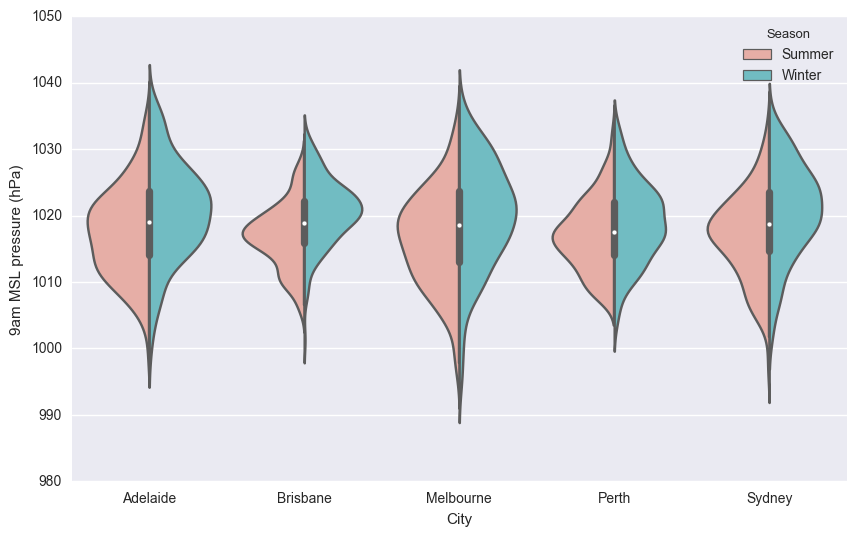

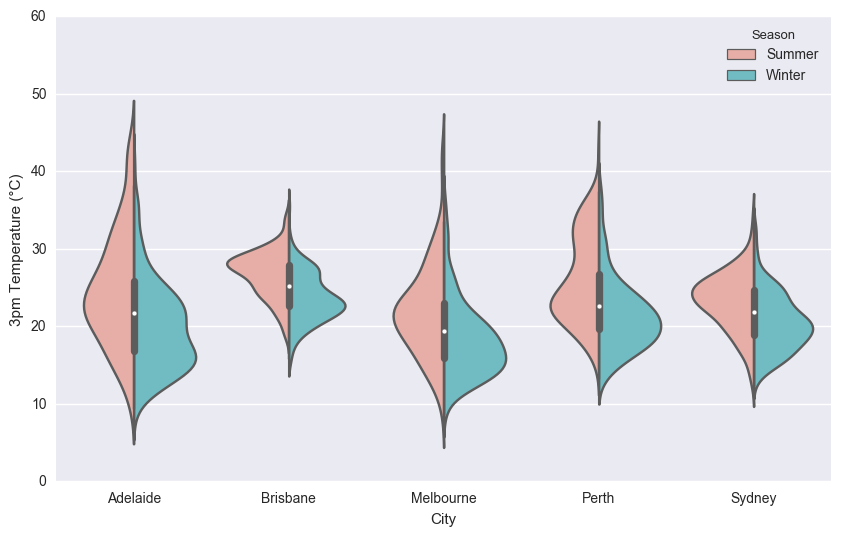

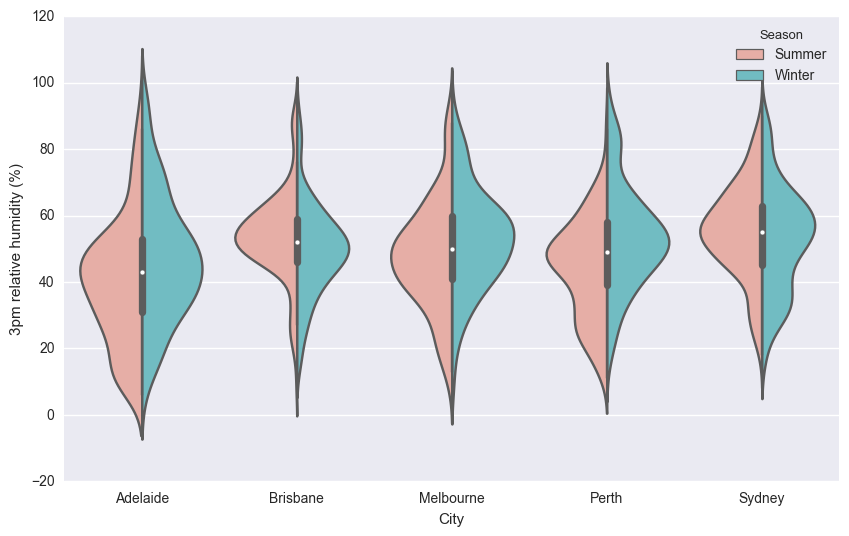

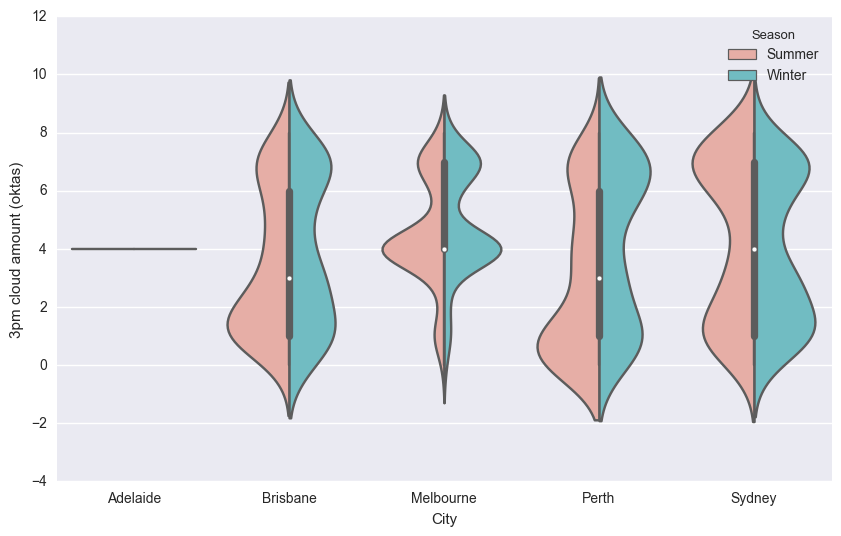

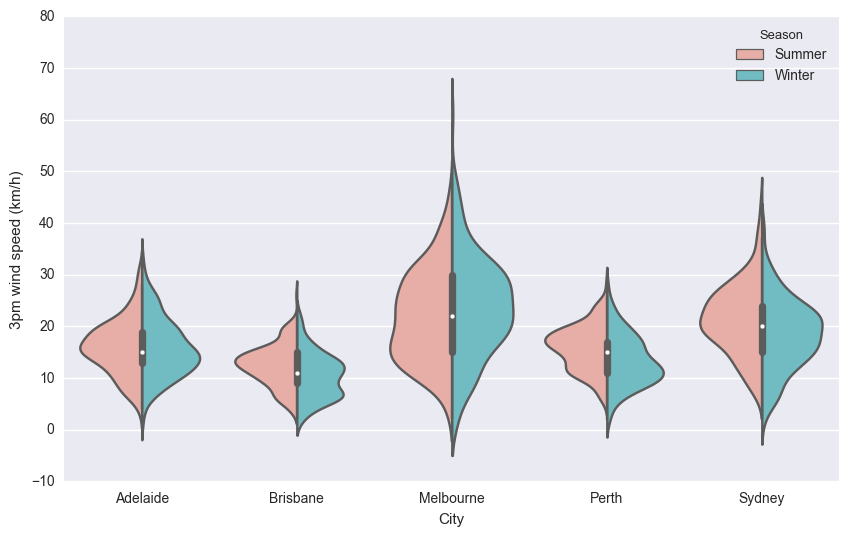

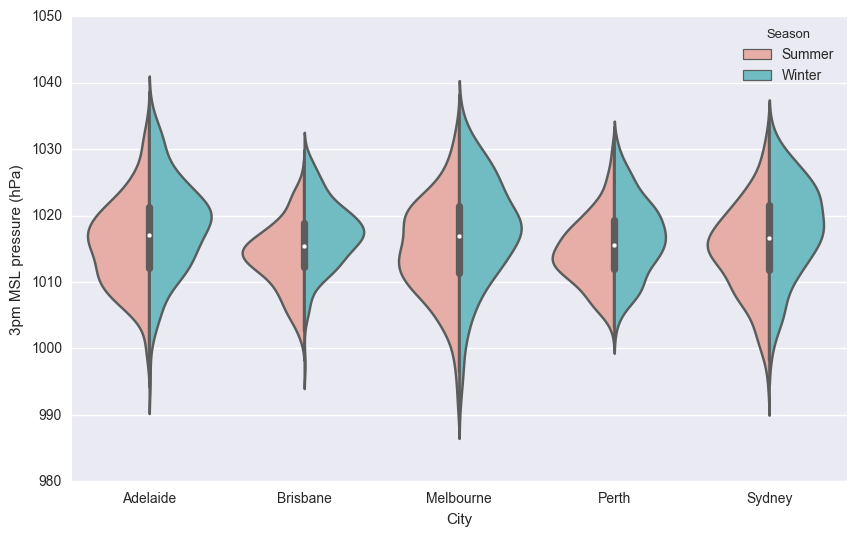

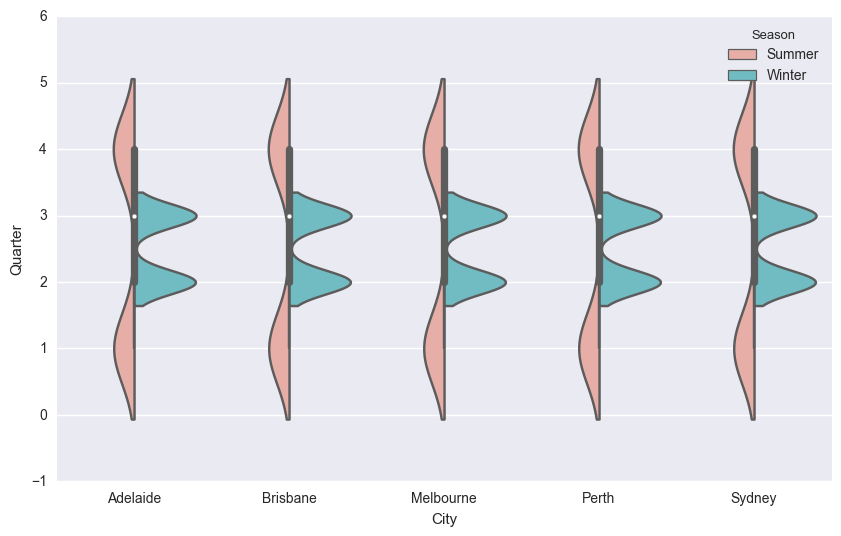

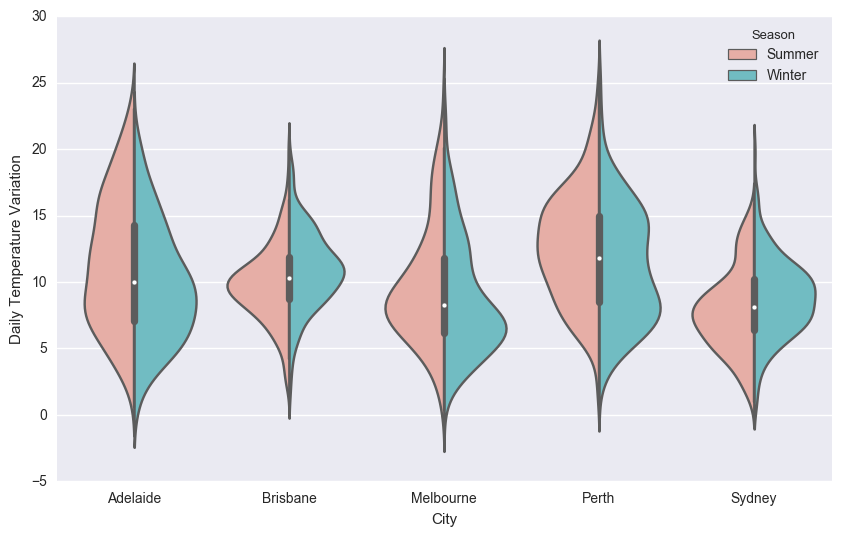

In [819]:
plot_dists(df, df.columns)

In [820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 1/1/2014 to 31/12/2014
Data columns (total 25 columns):
Minimum temperature (°C)             1825 non-null float64
Maximum temperature (°C)             1825 non-null float64
Rainfall (mm)                        1825 non-null float64
Evaporation (mm)                     1825 non-null float64
Sunshine (hours)                     1825 non-null float64
Direction of maximum wind gust       1825 non-null object
Speed of maximum wind gust (km/h)    1825 non-null float64
Time of maximum wind gust            1825 non-null object
9am Temperature (°C)                 1825 non-null float64
9am relative humidity (%)            1825 non-null float64
9am cloud amount (oktas)             1825 non-null float64
9am wind direction                   1825 non-null object
9am wind speed (km/h)                1825 non-null float64
9am MSL pressure (hPa)               1825 non-null float64
3pm Temperature (°C)                 1825 non-null float64
3pm

## Rainfall

In [821]:
def roll(df, col, roll=10):
    ncol = col + "_MA"
    df[ncol] = df.groupby("City")[col].transform(lambda x: x.rolling(roll).mean())
    return ncol

def cumsumCat(df, col):
    ncol = col + "_CS"
    df[ncol] =  df.groupby(["City"])[col].transform(lambda x: x.cumsum())
    return ncol

def plot_time(topl, col):
    f, ax = plt.subplots(1,1,figsize=(PW,PH)) 
    topl["Unit"] = 0
    sns_plt = sns.tsplot(data=topl, time="DateI",condition="City", unit="Unit", value=col, ax=ax);

    xticks = ax.get_xticks();
    # convert all xtick labels to selected format from ms timestamp
    ax.set_xticklabels([pd.to_datetime(tm) for tm in xticks], rotation=50)

    xticks = ax.get_xticks();
    # convert all xtick labels to selected format from ms timestamp
    ax.set_xticklabels([pd.to_datetime(tm) for tm in xticks], rotation=50)

    ax.set_xlabel("Date")
    return sns_plt

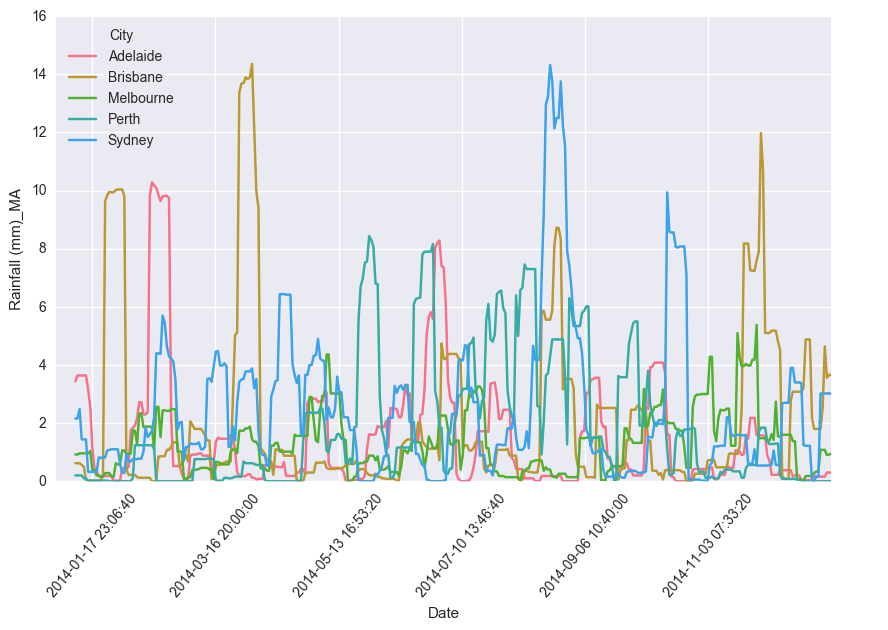

In [822]:
col = u'Rainfall (mm)'
ncol = roll(df, col, 10)

#Residual
#df[ncol] = df[col] - df[ncol]

topl = df#[df.Season == "Winter"]
plot_time(topl, ncol)
sns_plt.figure.savefig("./Plots/" + "RainfallWInter.png")

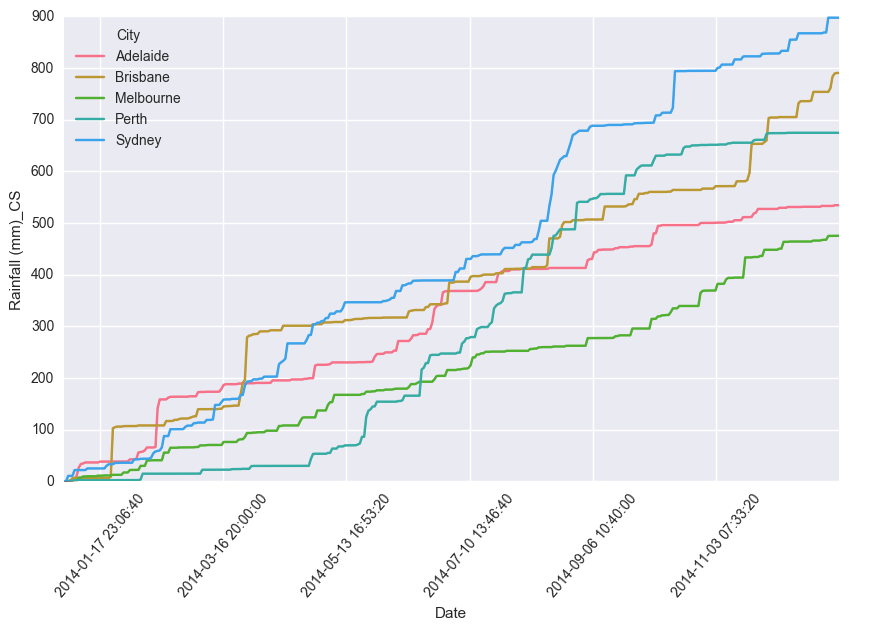

In [823]:
col = u'Rainfall (mm)'
ncol = cumsumCat(df, col)

topl = df
sns_plt = plot_time(df, ncol)

sns_plt.figure.savefig("./Plots/" + "CumulativeRainFall.png")

In [800]:
# col = u'Rainfall (mm)'
# ncol = roll(df, col, 5)
# #Residual
# df[ncol] = df[col] - df[ncol]
# topl = df#[df.Season == "Winter"]
# g = ggplot(topl, aes(x='DateI', y=ncol, color='City')) + \
#         geom_line(size=2.0,alpha=0.7) + \
#         xlab('Date') + \
#         ylab('Precipitation in mms') + \
#         ggtitle('Rainfall during Winter Period - Trend Component')
# g
# g.save("./Plots/Ranfall1.png")

In [801]:
# topl = df
# g = ggplot(topl, aes(x="DateI", y=ncol, color="City")) + \
#     geom_line() +\
#     xlab('Date') + \
#     ylab('Cumulative sum of Precipitation in mms') + \
#     scale_x_date(labels=None) +\
#     ggtitle('Cumulative Rainfall - Whole Year')
# g
# g.save("./Plots/Ranfall2.png")

## Temperature

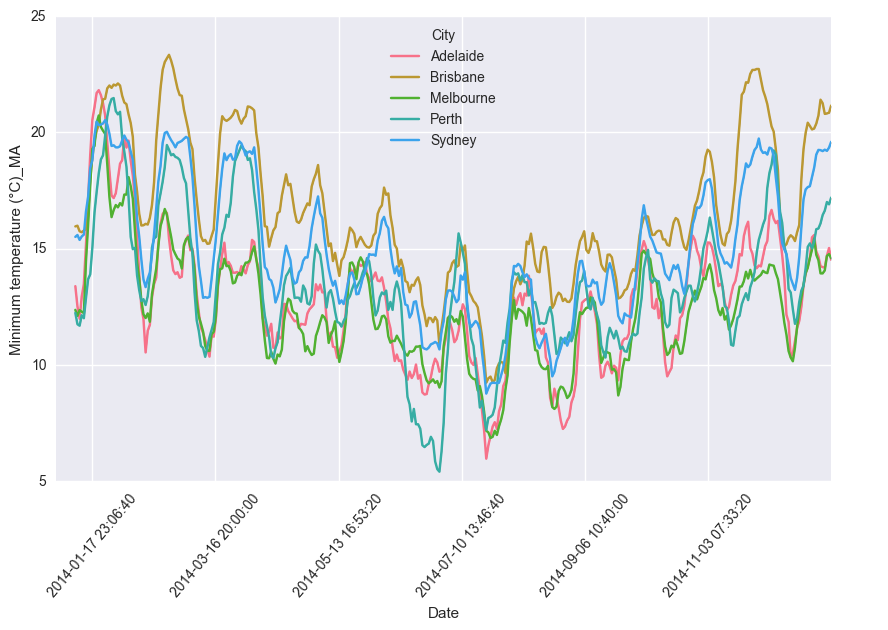

In [824]:
col = u'Minimum temperature (°C)'
ncol = roll(df, col, 10)

#Residual
#df[ncol] = df[col] - df[ncol]

topl = df#[df.Season == "Winter"]
plot_time(topl, ncol)
sns_plt.figure.savefig("./Plots/" + "MinTemp.png")

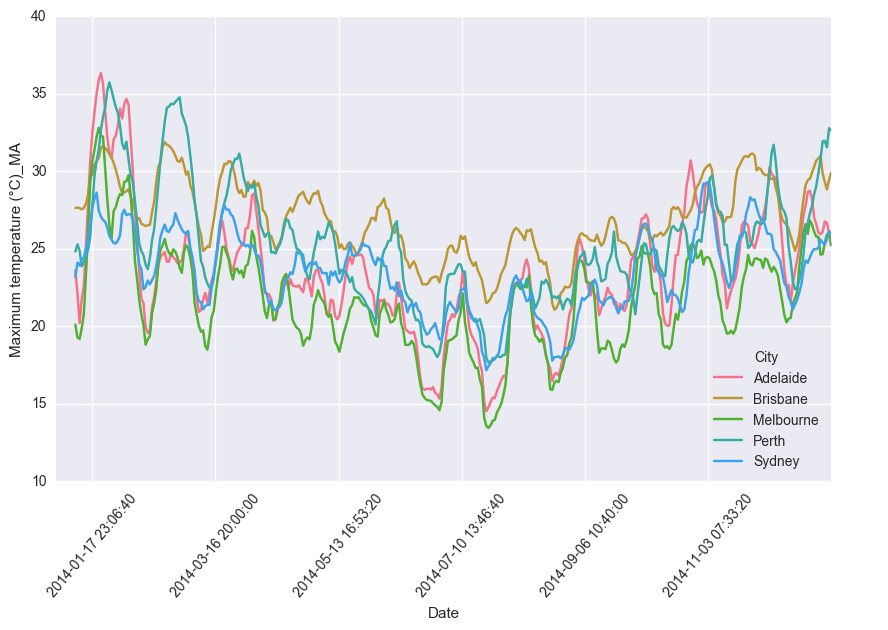

In [826]:
col = u'Maximum temperature (°C)'
ncol = roll(df, col, 10)

#Residual
#df[ncol] = df[col] - df[ncol]

topl = df#[df.Season == "Winter"]
plot_time(topl, ncol)
sns_plt.figure.savefig("./Plots/" + "MaxTemp.png")

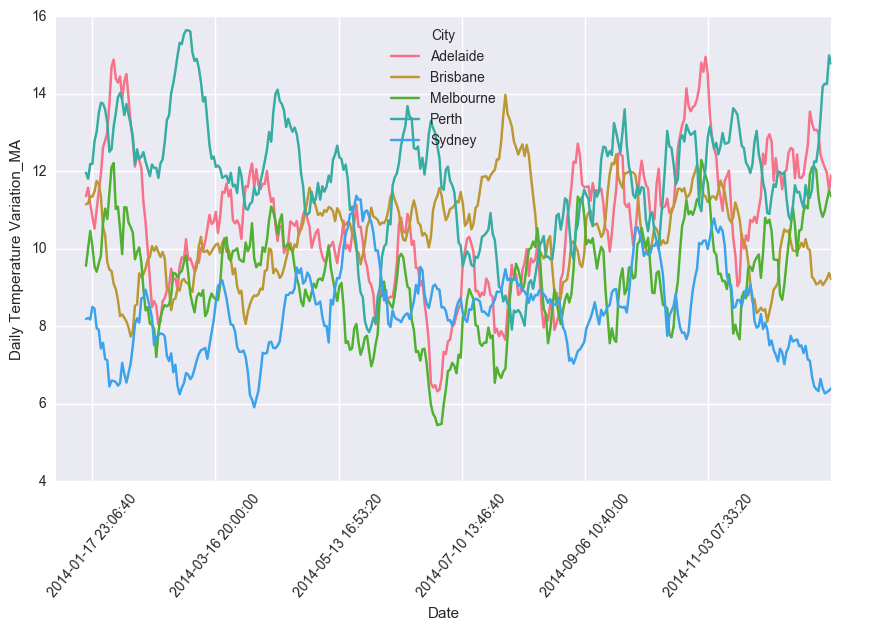

In [829]:
col = 'Daily Temperature Variation'
ncol = roll(df, col, 15)

#Residual
#df[ncol] = df[col] - df[ncol]

topl = df#[df.Season == "Winter"]
plot_time(topl, ncol)
sns_plt.figure.savefig("./Plots/" + "MaxTemp.png")